본 강좌에서는 회귀(regression)을 다층 퍼셉트론으로 해보겠습니다. 다음과 같은 순서로 진행하겠습니다.

1. 데이터셋 준비하기
1. 모델 구성하기
1. 모델 엮기
1. 모델 학습시키기
1. 모델 사용하기

---

### 데이터셋 준비하기

The problem that we will look at in this tutorial is the Boston house price dataset. The dataset describes properties of houses in Boston suburbs and is concerned with modeling the price of houses in those suburbs in thousands of dollars. As such, this is a regression predictive modeling problem. There are 13 input variables that describe the properties of a given Boston suburb. The full list of attributes in this dataset are as follows:

1. CRIM: per capita crime rate by town.
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town.
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise). 5. NOX: nitric oxides concentration (parts per 10 million).
6. RM: average number of rooms per dwelling.
7. AGE: proportion of owner-occupied units built prior to 1940. 8. DIS: weighted distances to five Boston employment centers. 9. RAD: index of accessibility to radial highways.
10. TAX: full-value property-tax rate per 10,000.
11. PTRATIO: pupil-teacher ratio by town.
12. B: 1000(Bk   0.63)2 where Bk is the proportion of blacks by town. 13. LSTAT: % lower status of the population.
14. MEDV: Median value of owner-occupied homes in   1000s.

데이터셋 샘플

    0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00 
    0.02731 0.00 7.070 0 0.4690 6.4210 78.90 4.9671 2 242.0 17.80 396.90 9.14 21.60 
    0.02729 0.00 7.070 0 0.4690 7.1850 61.10 4.9671 2 242.0 17.80 392.83 4.03 34.70 
    0.03237 0.00 2.180 0 0.4580 6.9980 45.80 6.0622 3 222.0 18.70 394.63 2.94 33.40 
    0.06905 0.00 2.180 0 0.4580 7.1470 54.20 6.0622 3 222.0 18.70 396.90 5.33 36.20

[설명](https://archive.ics.uci.edu/ml/datasets/Housing)
[다운](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data)

In [3]:
# Regression Example With Boston Dataset: Baseline
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [9]:
# load dataset
dataframe = pandas.read_csv("warehouse/housing.data", delim_whitespace=True, header=None)
dataset = dataframe.values
# split into input (X) and output (Y) variables
X = dataset[:,0:13]
Y = dataset[:,13]

---

### 모델 구성하기

Dense 클래스를 사용하여 완전 연결 레이어(Fully Connected Layer)를 정의할 수 있다.

- 첫번째 인자 : 뉴런의 수
- 두번째 인자 : 네트워크 가중치(network weight) 초기화 방법
 - uniform : 균등분포 (uniform distribution)의 작은 난수들로 초기화 (0~0.05 사이)
 - normal : 가우시안 분포 (Gaussian distribution)로 생성된 작은 난수들로 초기화 
- 세번째 인자 : 활성화 함수(activation function) 지정
 - relu : rectifier 활성화 함수
 - sigmoid : sigmoid 활성화 함수
 - tanh : tanh 활성화 함수
 
마지막 레이어는 sigmoid 할성화 함수를 사용하는데, 이유는 결과가 0과 1사이로 나오는 것을 보장하며, 양성 클래스의 확률로 쉽게 매핑할 수 있기 때문이다. 또한 0.5 임계치(threshold)을 같은 클래스의 범주형 분류(hard classification)를 할 수 있다.

- 첫번째 은닉층(hidden layer)는 12개 뉴런을 가지고, 8개 입력을 받아들인다.
- 두번째 은닉층은 8개 뉴런을 가진다.
- 마지막 레이어는 클래스를 예측하는 1개의 뉴런을 가진다.

In [10]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=13, init='normal', activation='relu'))
model.add(Dense(1, init='normal'))

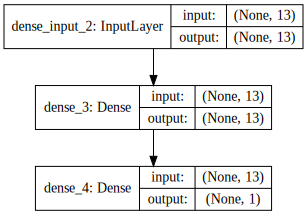

In [11]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

![svg]({{ site.baseurl }}/posts_warehouse/2017-2-4-1.svg)

---

### 모델 엮기

컴파일 시에 정의해야하는 것들
- 가중치 세트를 평가하는 데 사용할 손실함수(loss function)
 - binary_crossentropy : 이진 분류를 위한 logarithmic loss
- 네트워크의 다른 가중치를 검객하는 데 사용되는 최적화 알고리즘
 - adam : 효율적인 경사 하강법(gradient descent) 알고리즘
- 학습과정에서 수집하기 싶은 측정 기준

In [12]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam')

---

### 모델 학습시키기

- nb_epoch : 데이터셋에 대한 반복 횟수
- batch_size : 네트워크에서 가중치 개갱신 전에 평가되는 인스턴스의 수

In [13]:
# Fit the model
model.fit(X, Y, nb_epoch=100, batch_size=5) # nb_epoch 150

Epoch 1/100
506/506 [==============================] - 0s - loss: 297.2729     
Epoch 2/100
506/506 [==============================] - 0s - loss: 97.8218     
Epoch 3/100
506/506 [==============================] - 0s - loss: 77.4948     
Epoch 4/100
506/506 [==============================] - 0s - loss: 70.6009     
Epoch 5/100
506/506 [==============================] - 0s - loss: 64.7141     
Epoch 6/100
506/506 [==============================] - 0s - loss: 60.3480     
Epoch 7/100
506/506 [==============================] - 0s - loss: 58.4855     
Epoch 8/100
506/506 [==============================] - 0s - loss: 56.0351     
Epoch 9/100
506/506 [==============================] - 0s - loss: 55.3093     
Epoch 10/100
506/506 [==============================] - 0s - loss: 51.7408     
Epoch 11/100
506/506 [==============================] - 0s - loss: 49.8788     
Epoch 12/100
506/506 [==============================] - 0s - loss: 49.0121     
Epoch 13/100
506/506 [==========================

---

### 모델 사용하기

In [16]:
# evaliuate
scores = model.evaluate(X, Y)

print(" MSE : %.2f" %(scores))

 32/506 [>.............................] - ETA: 0s MSE : 17.42


In [9]:
scores

17.420470452591363

In [11]:
Y

array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
        18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
        20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
        14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
        20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
        19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
        18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
        25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
        22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
        23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
        22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
        33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
        19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
        19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
        15.7,  16.2,

---

### 같이 보기

* [강좌 목차](https://tykimos.github.io/lecture/)
* 이전 : [딥러닝 이야기/레이어 이야기](https://tykimos.github.io/2017/01/27/Layer_Talk/)
* 다음 : [딥러닝 기본 실습/컨볼루션 신경망 모델 만들어보기](https://tykimos.github.io/2017/02/04/CNN_Getting_Started/)